<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>


<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Operators
</td></table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle  \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Tr}{{\rm Tr}\,} $
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\Lin}{\hbox{Lin}} $


In [1]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

<a id='top'></a>

- [Operators and matrices](#opdefi) 

    - [*Matrix of an operator*](#matriz_op)  
<br>

- [Basis of operators](#op_basis)

    - [*Outer product*](#prod_ext)
    
    - [*Canonical basis*](#base_can)  

<br>    
  

- [El espacio vectorial Lin($\Hil$)](#linh)
<br>

    - [Classes of operators](#op_class)
    
        - [*Adjoint operator*](#opadj)

        - [*Unitary perator*](#opunit)
    
        - [*Normal operador*](#opnormal)
    
        - [*Hermitian operator*](#opermit)
    
        - [*Proyectors*](#opproyec)
<br>        

- [Eigenvalues and eigenvectors](#eigen) 

    - [*Eigenspaces*](#subesprop)
   
    - [*Spectrum of operators*](#especope)
    

<br>

- [Operator decompositions](#op_decomp)

    - [*Spectral Decomposition*](#spec_dec)

    - [*Polar decomposition*](#pol_dec)
    
    - [*Singular Value Decomposition (SVD)*](#svd_dec)

<br>    

- [Operator trace](#optrace)

    - [*Lin($\Hil$*) as a Hilbert space](#linhil)
    - [Operator norm and distance](#op_norm)

<br>


- [Linear Maps](#lin_map)
    - [Classes of linear maps](#class_lin_map)
    
<br>


- [Functions of operators](#func_op)
    - [Analytic functions](#anal_fun)
    - [General functions](#gen_func)

<br>    

- [Pauli matrices](#paulis)
    - [Pauli Algebra](#pauli_alg)

<br>    


<a id='opdefi'></a>
# Operators and Matrices

[<<<](#top)  

In a vector space, besides the vectors themselves, it is essential to understand the different ways in which they can be **transformed** into one another,


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
    <b>Definition:</b> <i>linear operator</i> 
<br>
<br>    
A linear operator is a map $A:\Hil \to \Hil$ that transforms one vector into another 
<br>
<br>
$$
A: \ket{u} ~~\to ~~ \ket{v}   
$$
<br>    
in a <i>linear</i> manner.   
<p>
</div>


Linearity refers to the following property:

$$
A: (\alpha\ket{u} + \beta\ket{w})~~\to ~~ \ket{v} = \alpha A\ket{u} + \beta A\ket{w}
$$


<div class="alert alert-block alert-danger",text-align:center>
<p style="text-align: left ">  
<b>Notation:</b>  
We also write $\ket{v} = A\ket{u} \equiv \ket{Au}$ $~~$ (where $Au$ should be understood as a label)
<br>
</p>
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> 
<br> An <i>operator</i> easy to visualize is the <i>rotation operator in a plane</i>. Given an angle $\theta \in (0,2\pi)$, the operator $A = R(\theta)$ rotates any vector by an angle $\theta$ counterclockwise.
<br>
<br>
A vector in the plane ${\bf u} = (u_1, u_2)$ is equivalent to the complex number $u = u_1 + i u_2$ in the complex plane $V = \mathbb{C}$.

Written in polar form, $u = |u| e^{i\phi}$, and we know that a rotation by an angle $\theta$ is equivalent to adding this angle to the phase:
<br>
<br>
$$
v = R(\theta) u = |u| e^{i(\phi + \theta)} = |u| e^{i\phi} e^{i\theta} = u \cdot e^{i\theta}
$$
<br>    
Therefore, to rotate a complex number by an angle $\theta$, it is enough to multiply it by the phase factor $e^{i\theta}$, which corresponds to the operator $R(\theta)$ in the vector space $V = \mathbb{C}$.

The fundamental property of a rotation is to keep the modulus invariant, $|v| = |u|$.    
</div>


<div class="alert alert-block alert-success">
<b>Exercise 1.3.1</b>
    
Using the previous example, define a function $R$ that receives a vector in the plane $(u_1,u_2)$ and returns the vector $(v_1,v_2)$ with components rotated by an angle $\theta$.
         
</div>
<br>
<details>
<summary><p style="text-align:left"> >> Solution </p></summary>

```python
def R(u1, u2, theta):
    u = u1 + u2*1j
    v = u * np.exp(1j * theta)  # u rotated by angle theta
    return v.real, v.imag
</details>

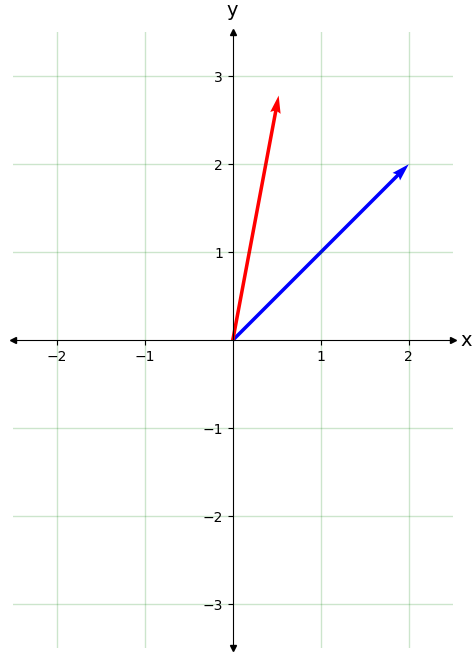

In [2]:

'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.

'''v1 y v2 a partir de u1, u2 y theta'''
def R(u1,u2,theta):
        u = u1 + u2*1j
        v = u*np.exp(1j*theta) # u rotado un angulo theta
        return v.real,v.imag
    
v1,v2 =  R(u1,u2,theta)

''' Representación en el plano complejo '''
v = v1**2+v2**2
tQ.plot_2D_plane(left=-int(abs(v1))-2,right=int(abs(v1))+2,up=int(abs(v2))+1,down=-int(abs(v2))-1)
tQ.draw_vector(u1,u1,vcolor='b')
tQ.draw_vector(v1,v2,vcolor='r')


<a id='matriz_op'></a>

## Matrix of an operator




*Given a basis* $\ket{i}$

$\Rightarrow$ a vector is specified by a *column of components*

$$
\ket{v} \sim \begin{pmatrix} v_1 \\ v_2\\ \vdots \\ v_N\end{pmatrix}
$$


$\Rightarrow$ an operator is defined by a *matrix of components*.

$$
A \sim \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
$$


Indeed, in a basis, the relation $\ket{v} = A\ket{u}$ is equivalent to an equation relating the components of both vectors.

$$
v_i = \sum_{j=1}^N A_{ij} u_j  \, .
$$

This operation corresponds to the following matrix multiplication:

$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix} \hspace{4cm}
$$

<div class="alert alert-block alert-warning">
    <b>Example:</b> 
<br> Continuing with the example of the rotation operator in a plane, we have seen that the components of $u = u_1 + i u_2$ and of $R(\theta)u = v = v_1 + i v_2$ are obtained by multiplication by a pure phase:
\begin{eqnarray}
v &=& u e^{i\theta} \\
\end{eqnarray}
    
Let's develop each side in Cartesian coordinates, separating the real and imaginary parts:
<br>    
\begin{eqnarray}
v_1 + i v_2 &=& (u_1 + i u_2)(\cos \theta + i \sin \theta)  \\
    \rule{0mm}{6mm}
    &=& (\cos\theta \, u_1 - \sin \theta\,  u_2) + i(\sin\theta\,  u_1 + \cos \theta\,  u_2)
\end{eqnarray}
<br>
    
That is, the coordinates of the original vector and the rotated image vector are related as

<br>
\begin{eqnarray}
v_1 = \cos\theta \, u_1 - \sin \theta\,  u_2 ~~~~~~~,~~~~~~~~
v_2 = \sin\theta \, u_1 + \cos \theta\,  u_2     
\end{eqnarray}
<br>

which can be expressed in matrix form as

$$
\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$    
    
</div>


<a id='op_basis'></a>

# Basis of Operators  

[<<<](#top)

<a id='prod_ext'></a>
## Outer Product 

Depending on the order in which we compose them, $~\braket{u}{v}~$ or $~\ketbra{v}{u}~$, the result is very different

- The **inner product**, or *scalar product*, is a *complex number*
<br>

$$
 a = \braket{u}{v} = \braket{v}{u}^* 
$$

- The **outer product** is an *operator*
<br>

$$
A = \ketbra{v}{u}
$$


To understand why it is an operator, we observe that this expression applied to a vector $\ket{w}$ gives another vector, <br>

$$
A : \ket{w} ~\to ~ A\ket{w} =  \ket{v}\braket{u}{w} = \ket{v} b = b \ket{v} 
$$


<div class="alert alert-block alert-danger">
<b>Note:</b> 
<br>
1. The <b>order</b> in which we write things is <b>very</b> important.
<br> 
<br>   
$\Rightarrow$ 
$\braket{u}{v}$ and $\ketbra{v}{u}$ are <i>radically different</i> objects: the first is a number and the second is an operator. 
<br>  
<br>    
$\Rightarrow$ On the other hand, $\ket{v} b = b \ket{v}$, as well as $\bra{u} b = b \bra{u}$, that is, complex numbers and $kets$ or $bras$ can be written in any order (we say they commute).
<br>
<br>
2. The action of the operator $A = \ket{v}\bra{u}$ is very easy to describe in words:
<br>  
    
- The operator $A$ takes <i>any vector</i> $\ket{w}$ and converts it into a vector <i>parallel</i> to $\ket{v}$, proportional to its projection $b = \braket{u}{w}$. 
<br>    
- If the projection is zero $b=0$, the operator <i>annihilates</i>, that is, it gives the neutral element.
</div>


### Outer product in components

The difference between the *inner product* $a = \braket{u}{v}$ and the *outer product* $A = \ketbra{u}{v}$ is reflected in a basis by expressing both vectors, $\ket{u} = \sum_i u_i \ket{i}$ and $\ket{v} = \sum_j v_j \ket{j}$, in components in an orthonormal basis.

- The *complex number* $a$ is the *scalar product*

$$
a = \braket{u}{v} = \begin{pmatrix} u_1^*, ..., u_N^* \end{pmatrix}
\begin{pmatrix} v_1 \\ \vdots \\ v_N \end{pmatrix} = \sum_i u_i^* v_i
$$

- The matrix $A_{ij}$ *represents* the operator $A$ in the basis $\{\ket{i} = \ket{e_i}\}$

$$
A = \ketbra{v}{u} ~\sim ~\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}
\begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix} ~=~ 
\begin{pmatrix} v_1 u_1^* & v_1u_2^* & ... & v_1 u_N^* \\
v_2 u_1^* & v_2 u_1^*& ... & v_2 u_N^* \\ \vdots & \vdots  & \ddots & \vdots \\
v_N u_1^* & & ... & v_N u_N^* \end{pmatrix} ~ = ~A_{ij}
$$

<br>

<a id='base_canonica'></a>
## Canonical basis of operators

Consider the *outer product* of two elements of the orthonormal basis
$\ketbra{i}{j}$
<br>

- The action of $\ketbra{i}{j}$ on another vector, $\ket{k}$, of the basis is simple:
<br>

$$
 \ket{i}\braket{j}{k} = \ket{i} \delta_{jk} = \left\{ \begin{array}{rl}
0 & {\rm if} ~~ k \neq j \\ \ket{i} & {\rm if} ~~ k = j \end{array} \right.
$$


- The matrix associated with the operator has only a 1 in the $(i,j)$ element and zeros everywhere else. For example, suppose
$N=4$

<br>

$$
\ketbra{2}{3} ~\to ~~
 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\begin{pmatrix} 0 & 0 & 1 & 0 \end{pmatrix} = 
\begin{pmatrix}
0 &  0 & 0 &  0 \\  0 &  0 & 1&  0 \\ 0 &  0 & 0 &  0 \\ 0 &  0 & 0 &  0
\end{pmatrix} ~~\Rightarrow ~~ A_{ij} = \delta_{i2}\delta_{j3}
$$

<br>

The <i>matrix elements</i> $A_{ij}$ express the components of an operator in the <b>operator basis</b> $\ketbra{i}{j}$.


$$
A ~=~ \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} 
$$

<details>
<summary><p style="text-align:left"> >> <i>Consistency</i> </p></summary>
Let's verify that it acts correctly
$$
\begin{array}{rcl}
A |u\rangle &=&  \sum_{i,j} A_{ij} \ketbra{i}{j}  \left(\sum_k u_k |k\rangle \right) \\
&\stackrel{\rm linealidad}{=} \rule{0mm}{6mm}& \sum_{i,j} \sum_k A_{ij} | i\rangle  \,   u_k \langle j| k\rangle \nonumber\\
&\stackrel{\rm ortonormalidad}{=}\rule{0mm}{6mm}& \sum_{i,j,k} A_{ij} | i\rangle  \,   u_k \delta_{jk}\\
&=\rule{0mm}{6mm}&\sum_{ij} A_{ij}\,|i\rangle \, u_j= \sum_i \left(\sum_{j} A_{ij}\, u_j\right)  |i\rangle    \\
&=\rule{0mm}{6mm}&\sum_i v_i \ket{i} \nonumber\\
&=\rule{0mm}{6mm}&   | v\rangle
\end{array}
$$
</details>

### Matrix elements

In the same way that we obtained the components of a vector by projecting onto a basis element

$$
v_i = \braket{i}{v}
$$

we can now obtain the *matrix elements* of an operator $A$ as

$$
A_{ij} = \bra{i} A \ket{j}
$$


<div class="alert alert-block alert-success">
<b>Exercise 1.3.2</b>
<br>
Check the consistency of the expressions $~A = \sum_{i,j=1}^N A_{ij} \ketbra{i}{j} $ and $~A_{ij} = \bra{i} A \ket{j}$
</div>
<details>
<summary><p style="text-align:right"> >> <i>Solution:</i> </p></summary>
Here is your solution
</details>    

<div class="alert alert-block alert-warning">
<b>Summary:</b> 
<br>     
Given a basis $\{\ket{i}\}$, we can express an operator through a matrix $A_{ij}$. The precise relation is
<br>
<br>
- as an operator $\to ~ A = \sum_{ij} A_{ij} \ketbra{i}{j}$
<br>
<br>    
- as a matrix element $\to ~ A_{ij} = \bra{i} A \ket{j}$
<br>   
</div>


### Change of basis

Two orthonormal bases $\ket{e_i}$ and $\ket{\tilde e_i}$ are linearly related by a matrix

$$
\ket{e_j} \to \ket{\tilde e_j} = \sum_{i} U_{ij} \ket{e_i}
$$

The *adjoint* relation is straightforward to obtain:

$$
\bra{e_j} \to \bra{\tilde e_j} = \sum_i U^*_{ij} \bra{e_i}
$$


In each basis, an operator $A$ is *represented* by different matrix elements

$$
A_{ij} = \bra{e_i} A \ket{e_j} ~~~~,~~~~~ \tilde{A}_{ij} = \bra{\tilde{e}_i} A \ket{\tilde{e}_j} \, .
$$


We can find the relation by substituting the change of basis

\begin{eqnarray}
\tilde A_{ij} &=& \bra{\tilde e_i} A \ket{\tilde e_j} \\ \rule{0mm}{8mm}
&=& \sum_{k}U^*_{ki}\bra{e_k} ~A~ \sum_l U_{lj}\ket{e_l} \\ 
&=&  \sum_{k,l} U^\dagger_{ik}\bra{e_k} A  \ket{e_l}U_{lj}   = \sum_{k,l} U^\dagger_{ik}A_{kl} U_{lj} \, .
\end{eqnarray}

<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left; color: navy;">
<b> Lemma </b>: 
<br>        
Under a change of orthonormal bases $ \ket{e_j} \to \ket{\tilde e_j} = \sum_{i} U_{ij} \ket{e_i}$, the components of a vector $\ket{v}$ and of an operator $A$ change according to the rule:

<br>
<br>        
\begin{eqnarray}
\tilde v_i &=& (U^\dagger \cdot v)_i \\ \rule{0mm}{12mm}
\tilde A_{ij} &=& (U^\dagger \cdot A \cdot U)_{ij}
\end{eqnarray}
        
</div>


<div class="alert alert-block alert-danger">
<b>Note:</b> 
<br>  
The mnemonic rule is that columns are multiplied by $U^\dagger \cdot$ and rows by $\cdot\, U$
</div>
$$
\begin{pmatrix} \tilde v_1 \\ \vdots \\ \tilde v_N \end{pmatrix} = 
U^\dagger \cdot \begin{pmatrix} v_1 \\ \vdots \\  v_N \end{pmatrix} ~~~~
~~~~~~~;~~~~~~~~
\begin{pmatrix} 
\tilde A_{11} & \cdots & \tilde A_{1N} \\
\tilde \vdots & \ddots & \vdots  \\
\tilde A_{N1} & \cdots & \tilde A_{NN} 
\end{pmatrix} 
 =  U^\dagger\cdot
 \overbrace{\begin{pmatrix} 
 A_{11} & \cdots &  A_{1N} \\
\tilde \vdots & \ddots & \vdots  \\
 A_{N1} & \cdots &  A_{NN} 
\end{pmatrix} }^{\large \cdot ~ U}
$$
    
</div>

<div class="alert alert-block alert-success">
<b>Exercise 1.3.3</b>$~$    
    
Write a function $basis\_change$ that receives a change of basis matrix $U_{ij}$ with $\ket{\tilde e_j} = \sum_i U_{ij} \ket{e_i}$, the components $v_i$ of a vector, or $A_{ij}$ of an operator, and returns the components $\tilde v_i$ or $\tilde A_{ij}$ in the new basis.

<a href="../FICC_solutions.ipynb#Ex_1.3.3">solution</a>
    
<br>
<b>Exercise 1.3.4</b>$~$        

The matrix $\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$ represents an operator $\sigma_y$ in the basis $\{\ket{0}, \ket{1}\}$. Write $\sigma_y$ in the basis $\{\ket{+i} = \frac{1}{\sqrt{2}}(\ket{0} + i \ket{1}), \ket{-i} = \frac{1}{\sqrt{2}}(\ket{0} - i \ket{1})\}$.
    
<a href="../FICC_solutions.ipynb#Ex_1.3.3">solution</a>
    
</div>


### Completeness relation    

The action of the identity operator is

$$
I \ket{v} = \ket{v}
$$

In particular, on every basis element $I \ket{i} = \ket{i}$. In other words,  
the identity operator $I$ has matrix elements $I_{ij} = \delta_{ij} = \text{diagonal}(1,1,\ldots,1)$, so that
<br>

$$
I = \sum_i \ketbra{i}{i} = \sum_{ij} \delta_{ij} \ketbra{i}{j}
$$

This expression is also known as the <b>completeness relation</b> or the <b>closure relation</b> and is used very frequently.


<div class="alert alert-block alert-danger">
<b>Note:</b> 
<br>
The completeness relation is, in fact, a property of <b>any basis</b>. 
    
In other words, if $\{\ket{e_i}\}$ and $\{\ket{\tilde e_i}\}$ are both bases, then $I \ket{e_i} = \ket{e_i}$ and $I \ket{\tilde e_j} = \ket{\tilde e_j}$, so $+1$ is the only eigenvalue of $I$ in any basis, and the spectral decomposition gives
<br>
<br>
$$
I = \sum_i \ketbra{e_i}{e_i} = \sum_j \ketbra{\tilde e_j}{\tilde e_j} \, .
$$
</div>


The closure, or completeness, relation can **always be inserted** at any step of a calculation. It is frequently used to perform changes of basis.


For example, let's see that the inner product $\braket{u}{v}$ can be calculated in any basis.

Let $\ket{u} = \sum_i u_i \ket{e_i} = \sum_i \tilde u_i \ket{\tilde e_i}~~$ and $~~
\ket{v} = \sum_i v_i \ket{e_i} = \sum_i \tilde v_i \ket{\tilde e_i}$ 
<br>
<br>


Then

$$ 
\braket{v}{u} = \bra{v} I \ket{u} = \bra{v}\left(\sum_i\ketbra{e_i}{e_i}\right)\ket{u} = 
\sum_i \braket{v}{e_i}\braket{e_i}{u} = \sum_i v_i^* u_i
$$ 
<br>
<br>
$$ 
\braket{v}{u} = \bra{v} I \ket{u} = \bra{v}\left(\sum_i\ketbra{\tilde e_i}{\tilde e_i}\right)\ket{u} = 
\sum_i \braket{v}{\tilde e_i}\braket{\tilde e_i}{u} = \sum_i \tilde v_i^* \tilde u_i
$$ 
<br>


<a id='linh'></a>

#  $\Lin(\Hil)$ as a vector space

[<<<](#top)

The <i>set</i> of **all** <i>linear operators</i> over a vector space $\Hil$ naturally has the structure of a vector space, which we denote by $\Lin(\Hil)$.


Given two operators, $A$ and $B$, both the sum $C = A + B$ and the multiplication by a complex number $D = \lambda A$ are *new operators* defined by their action on any vector $\ket{v} \in \Hil$.
<br>
<br>

$$
C\ket{v} ~=~ (A + B) \ket{v} = A\ket{v} + B\ket{v}
$$
<br>

$$
D\ket{v} ~=~ (\lambda A) \ket{v} = \lambda (A\ket{v})
$$

<a id='opadj'></a>
## Adjoint operator

    
The *adjoint* conjugation can be extended to
 ${\rm Lin}(\Hil)$
<br><br>

$$
\dagger ~\to ~
\left\{
\begin{matrix}
z & \leftrightarrow  &  z^* \\
|u\rangle & \leftrightarrow &   \langle u | \\
A & \leftrightarrow & A^{\dagger}
\end{matrix}
\right. \hspace{5cm}
$$
<br>

and there are <b>two more rules</b> that allow applying $\dagger$ to sums and products of <i>objects</i> $a \in \{z, \ket{u}, A\}$
<br>

- *linearity* $(a + b)^\dagger = a^\dagger + b^\dagger$
<br>

- *transpose* $(ab)^\dagger = b^\dagger a^\dagger$ (only relevant when $a$ and $b$ do not commute)
<br>


Examples
<br>
<br>
1. $
\ket{v} = A \ket{u} ~~~~\Leftrightarrow~~~~ \bra{v} = \bra{u} A^\dagger
~~$ where the operator on the right acts on the *bra* to its left.
<br>
<br>
Note that, since $\ket{v}^\dagger = \ket{Au}^\dagger = \bra{Au}$, the previous equation implies
<br>
<br>
$$
\bra{Au} = \bra{u} A^\dagger
$$
<br>
2. 
$
\bra{w} A \ket{u}^* = (\bra{w} A \ket{u})^\dagger = \bra{u} A^\dagger \ket{w}
$


### Adjoint matrix

These rules allow us to obtain the adjoint of an operator

<br>

$$
A^\dagger = \sum_{ij} \left( A_{ij} \ketbra{i}{j} \right)^\dagger = \sum_{ij} \ketbra{j}{i} A_{ij}^* = \sum_{ji} A_{ji}^* \ketbra{i}{j}
$$

where in the last equation we have swapped the indices $i \leftrightarrow j$
<br>
<br>


We see that the matrix representing $A^\dagger$ is the *adjoint matrix* of $A_{ij}$, that is, the transpose and conjugate
<br>

$$
(A^\dagger)_{ij} = A^*_{ji} = (A^*_{ij})^t \equiv (A_{ij})^\dagger
$$

where $^\dagger$ means the adjoint of an operator on the left, and of a matrix on the right.


If $\Hil$ has dimension $N$, a *general operator* $A \in \Lin(\Hil)$ is specified by a matrix of $N^2$ complex numbers, so

$$
A = A_{ij} \ket{e_i} \bra{e_j}.
$$

$N^2$ complex numbers correspond to $2N^2$ real numbers.



In other words: $A$ has $N^2$ complex degrees of freedom and, therefore, this is the dimension of the space ${\rm L}(\Hil)$:
<br>

$$
{\rm dim}_{\mathbf{C}}(\Lin(\Hil)) = N^2 ~~~ \Longleftrightarrow ~~~ {\rm dim}_{\mathbf{R}}(\Lin(\Hil)) = 2 N^2
$$
<br>


<a id='op_class'></a>
# Classes of operators

Within $\Lin(\Hil)$ we can define subsets of operators that maintain certain important properties. Some will form vector subspaces, while others will not.

We can define such **classes of operators** by requiring them to satisfy some *condition* or *restriction*.


<a id='opunit'></a>
## Unitary Operator

<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: center;"> <p style="text-align: left; color: navy;">  
<b>Definition:</b>  
<br> A <i>unitary operator</i> $U$ is one such that its <i>adjoint</i> equals its <i>inverse</i>
<br><br>    
$$
U^\dagger = U^{-1}
$$
<p>
</div>


Naturally, this equation translates into the same equation for the associated matrices in *any basis*
<br>
<br>
$$
(U_{ij})^\dagger = U_{ji}^* = U^{-1}_{ij}
$$
<br>
Let us now see why we have defined this class of operators.


<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left ;color: navy;">  
<b>Theorem:</b>
<br>    
    The action of a <i>unitary operator</i> preserves the <i>inner product</i> of any two vectors intact.
</div>

<details>
<summary><p style="text-align:left"> >> <i>Proof</i> </p></summary>

Let $U$ be a unitary operator, and $\ket{\varphi'} = U \ket{\varphi}$ and $\ket{\psi'} = U \ket{\psi}$ be two vectors transformed by $U$, then

$$
\braket{\varphi'}{\psi'} = \left( \bra{\varphi} U^\dagger \right) U \ket{\psi} = \bra{\varphi} U^\dagger U \ket{\psi} = \braket{\varphi}{\psi}
$$

Specializing to $\ket{\varphi} = \ket{\psi}$, we have that a unitary operator *preserves the norm*.

$$
\| U \ket{\varphi} \| = \| \ket{\varphi} \|
$$

</details>


- In particular, it preserves the <i>norm</i> of any vector.
<br>

- Therefore, it preserves the *distance* between two vectors, $d(\ket{v}, \ket{w}) = \| \ket{v} - \ket{w} \|$.


-  **Composition** of unitary operators **is** unitary

$$
(UV)^\dagger = V^\dagger U^\dagger = V^{-1} U^{-1} = (UV)^{-1}
$$


Mathematically, this means that unitary operators form a *group*.


<br>

- **Linear combination** of unitary operators **is not** unitary
<br>

$$
(a U + b V)^\dagger = a^* U^\dagger + b^* V^\dagger = a^* U^{-1} + b^* V^{-1} \neq (a U + b V)^{-1}
$$


Mathematically, this means that unitary operators **do not form** a *vector subspace* of $\Lin(\Hil)$.


- Therefore, unitary operators <i>do not form</i> a vector subspace within $\Lin(\Hil)$.
<br>
<br>
The mathematical structure they form is called a <i>group</i>: the unitary group $U(d)$ acts on the Hilbert space $\Hil$ of dimension $d$.


- Nevertheless, they form a *manifold*: a continuous set that can be parameterized by a collection of parameters, called the *dimension of the manifold*.


- Since there is a one-to-one correspondence between an operator and a matrix (in a basis), that dimension will be equal to the *dimension of the set of unitary matrices*.



<div class="alert alert-block alert-success">
<b>Exercise 1.3.4</b>
<br>    

Subtract from ${\rm dim}_{\bf R}(\Lin(\Hil)) = 2N^2$ the number of equations that restrict the matrix of a unitary operator, and thus find the (real) dimension of the group $U(N)$ of <i>unitary operators</i> of dimension $N$.
</div>


### Orthonormal bases

- As a particular case, applying a unitary operator $U$ to an orthonormal basis $\{\ket{e_i}\}$ yields another orthonormal basis $\{\ket{\tilde e_i}\}$
<br>

$$
\left. \begin{array}{c}\ket{\tilde e_i} = U\ket{e_i}\\ U^{-1} =  U^\dagger \end{array} \right\}
~~~~ \Longleftrightarrow ~~~~\braket{\tilde e_i}{\tilde e_j} = \bra{\tilde e_i}U^\dagger U\ket{\tilde e_j} = \braket{e_i}{e_j} = \delta_{ij}
$$

<br>


Conversely, given two orthonormal bases, $\{\ket{e_i}\}$ and $\{\ket{\tilde e_i}\}$, the operator relating them is a unitary operator

$$ 
 \begin{array}{rcl} 
U = \sum_i \ketbra{\tilde e_i}{e_i} & \Rightarrow &  U\ket{e_j} = \ket{\tilde e_j} 
 \\ \rule{0mm}{10mm}
U^\dagger = \sum_i \ketbra{e_i}{\tilde e_i}  & \Rightarrow &    U^\dagger\ket{\tilde e_j} = \ket{e_j} ~~~\Rightarrow ~~~U^\dagger = U^{-1}
 \end{array}
$$


- An <i>orthogonal operator</i> is a particular case of a unitary operator with *real matrix elements*. The rotation operator $R(\theta)$ that we studied at the beginning of this topic is an orthogonal operator. It is straightforward to verify that

$$
R(\theta)^\dagger = R(\theta)^t = R(-\theta) = R(\theta)^{-1}
$$


In [2]:
U=np.matrix([[1,1J],[1J, + 1]])/np.sqrt(2)
array_to_latex(U)

<IPython.core.display.Latex object>

In [5]:
Uadj=U.getH() # getH es un método de la clase matrix que devuelve la matriz conjugada hermítica
array_to_latex(Uadj)

<IPython.core.display.Latex object>

In [6]:
print('check that U is unitary')

array_to_latex(np.dot(Uadj,U))

check that U is unitary


<IPython.core.display.Latex object>

<a id='opnormal'></a>
## Normal Operator
    
<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left; color: navy;">  
    <b>Definition:</b> An operator $N$ is <i>normal</i> if it commutes with its adjoint
<br>
<br>    
$$
N N^\dagger = N^\dagger N
$$  
</div>


The matrix $N_{ij}$ has an important property.

<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left; color: navy;">  
<b>Theorem:</b> 
<br>
<br>    
$N_{ij}$ is the matrix of a normal operator, $[N, N^\dagger] = 0$, if and only if it is <i>unitarily equivalent</i> to a diagonal matrix.
<br>    
<br>    
That is, if there exists $U$ with $U^{-1} = U^\dagger$ such that
<br>
<br>
$$
N'_{ij} = (U^{\dagger} N \, U)_{ij} = 
\begin{bmatrix} \lambda_1 &  & &  \\ & \lambda_2 & &  \\ & & \ddots &  \\ & & & \lambda_D \end{bmatrix}
$$
</p>
</div>


<a id='ophermit'></a>
## Hermitian Operator

<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Definition:</b> An operator $H$ is <i>Hermitian</i> (or <i>self-adjoint</i>) if it satisfies the following equation 
<br>
<br>    
$$
H = H^\dagger 
$$   
</p>
</div>



Obviously, a Hermitian operator $~\Rightarrow$ is a normal operator, but the converse does not necessarily hold.

- **Linear combination** of *Hermitian* operators with **real** coefficients **is** Hermitian  
<br>
<br>
$$
C^\dagger = (a A + b B)^\dagger = a^* A^\dagger + b^* B^\dagger = aA + b B = C
$$


Mathematically: the self-adjoint operators form a real vector subspace $\mathrm{Her}(\Hil) \subset \Lin(\Hil)$.


- **Composition** of Hermitian operators is generally **not** Hermitian  
<br>
<br>
$$
(AB)^\dagger = B^\dagger A^\dagger = BA \neq AB
$$

Mathematically, they do not form a group unless $A$ and $B$ commute with each other, in which case they form an *Abelian group*.


- The matrix associated with a Hermitian operator is also called Hermitian, and it equals its conjugate transpose.
<br>

$$
A_{ij} = A^\dagger_{ij} \equiv  A^{*t}_{ij} = A^*_{ji}   \hspace{4cm}
$$



<div class="alert alert-block alert-danger">
    <b>Note:</b>
<br>
From any operator $C \neq C^\dagger$, we can always construct a Hermitian operator $H = H^\dagger$ by the linear combination
<br>    

$$
H = C + C^\dagger
$$
<br>
where $a$ is a real number. This trivially extends to the matrices representing them in any basis
    
<br> 
$$
H_{ij} = C_{ij} + C_{ji}^*
$$ 
   
</div>


<div class="alert alert-block alert-success">
<b>Exercise 1.3.5</b>
<br>    
    
Subtract from ${\rm dim}_{\bf R}({\rm L}(\Hil)) =  2N^2$ the number of equations that constrain the matrix of a Hermitian operator and thus find the (real) dimension of the <i>vector subspace of Hermitian operators</i>. 
</div>


If you have done the last two exercises, you will have found the same answer in both. This means there could be a relationship between Hermitian and unitary matrices.


<a id = 'semipos_op'></a>
## Positive Semidefinite Operator

<div class="alert alert-block alert-info" style="text-align:center">
<p style="text-align: left ;color: navy;">  
<b>Definition:</b> $~$ we say that an operator $A$ is <i>positive semidefinite</i> (or <i>non-negative</i>) if it satisfies
<br>
<br>    
$$
\bra{u} A \ket{u} \geq 0 
$$   
for all $\ket{u} \in \Hil$. 
</p>
</div>

In this case, we write $A \geq 0$. 



If the inequality is strict, $\bra{u} A \ket{u} > 0$ for all $\ket{u}$, then $A$ is called a *positive operator*, denoted $A > 0$.


The following theorem is the equivalent of the fact that a real number $a \in \mathbb{R}$ has a square root if and only if it is non-negative.

<div class="alert alert-block alert-info" style="text-align:center">
<p style="text-align: left ;color: navy;">  
<b>Theorem:</b> A Hermitian operator $A$ is <i>positive semidefinite</i> if and only if there exists another operator $B$ such that
<br>
<br>
$$   
A = B^\dagger B
$$   
for all $\ket{u} \in \Hil$.
</p>
</div>


<a id='opproyec'></a>
## Projectors

[<<<](#top)

<div class="alert alert-block alert-info" style="text-align:center">
 <p style="text-align: left ;color: navy;">  
<b>Definition:</b>  
A <i>projector</i> is a Hermitian operator that satisfies the equation
<br><br>
$$
P^2 = P
$$
</div>
 



- The operator $P = \ketbra{u}{u}$ fulfills 

it is Hermitian

$$
P^\dagger = \ketbra{u}{u} = P
$$
<br>



- it is idempotent

$$
P^2 = \ket{u}\braket{u}{u}\bra{u} = \ketbra{u}{u} = P
$$
<br>




- It indeed projects **any vector** onto the direction of $\ket{u}$

$$
P \ket{w} = \ket{u}\braket{u}{w} = a \ket{u}
$$
<br>


where the complex number $a = \braket{u}{w}$ is the **projection**


<div class="alert alert-block alert-danger">

<b>Note:</b>
    
-   The projection is <b>non-invertible</b>
<br>
    
- The projector is a <b>non-unitary</b> operator: in general it <i>reduces</i> the norm 
<br>
$$
\| P\ket{w}\|^2 = \bra{w}P^\dagger P\ket{w} = \bra{w} P\ket{w}= \braket{w}{u}\braket{u}{w} = |\braket{u}{w}|^2 < \|\ket{u}\|\|\ket{w}\| = 1  
$$
<br>    
where we have applied the <i>Cauchy-Schwarz inequality</i>, which is strict if we assume $\ket{u} \neq \ket{w}$.
</div>


<div class="alert alert-block alert-warning">

- ### Matrix associated to a projector


If $\ket{u} = \ket{e_1}$, the operator $P_1 = \ket{e_1}\bra{e_1}$ projects any vector onto its component along $\ket{e_1}$.    
<br>
    
In matrix form
 $$
 \ket{e_1}\bra{e_1} = \begin{pmatrix} 1 & 0 & ...& 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \vdots\\ 0 \end{pmatrix} =
 \begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix}
 $$
so that
$$
    \ket{e_1}\braket{e_1}{u} ~= ~\begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_N \end{pmatrix}
 = \begin{pmatrix} u^1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = u^1 \ket{e_1}
$$
    
</div>


<div class="alert alert-block alert-warning">
    
If $\ket{u} = \sum_i u^i\ket{e_i}$ is a unit vector with $\|\ket{u}\|=1$, then the projector along $\ket{u}$ is given by
<br>
<br>
$$
P(u) = \ketbra{u}{u} = \sum_{i,j} u_i u^*_j \ketbra{e_i}{e_j}
$$
<br>
That is, it is associated with a matrix given by $P_{ij} = u_i u^*_j$. It is straightforward to verify that
<br>
<br>
$$
P^2_{ik} = \sum_j P_{ij} P_{jk} = \sum_j u_i u^*_j u_j u^*_k = u_i \left(\sum_j u^*_j u_j \right) u_k^* = u_i u_k^* = P_{ik}
$$
<br>
as corresponds to a projector.
    
</div>


 ### Orthogonal projectors 


- $P_1$ and $P_2$ are orthogonal projectors if they satisfy

$$
P_1^2 = P_1~~~~~~P_2^2 = P_2 ~~~~~~~P_1 P_2 = P_2 P_1 =  0
$$
<br>

- if $P_1$ and $P_2$ are orthogonal projectors, $P = P_1 + P_2$ is also a projector

$$
P^2 = (P_1 + P_2) (P_1 + P_2) = P_1^2 + P_1 P_2 + P_2 P_1 + P_2^2 = P_1 + P_2 = P
$$
<br>



- A particularly important case of orthogonal proyectors is $P_1 = P$ and $P_2 = P_\perp = I - P$. 

<details>
<summary><p style="text-align:left"> >> <i>Proof</i> </p></summary>


indeed $P_\perp$ is a projector

$$~~ P_\perp^2 = (I - P)(I-P) = I^2 - P - P + P^2 = I- P = P_\perp $$

and it is perpendicular to $P$

\begin{eqnarray}
P_\perp P &=& (I - P) P = P - P^2 = P - P =  0 
\end{eqnarray}

</details>

Given a vector $\ket{u}$, we can decompose any other vector $\ket{\psi}$ into its parallel and perpendicular projections

$$
\ket{\psi} = ( P + P_\perp) \ket{\psi} = a \ket{u} + b \ket{u_\perp} 
$$

where $a = \braket{u}{\psi}$ and  $b = \braket{u_\perp}{\psi}$


The equation $\ket{\psi} = a \ket{u} + b\ket{u_\perp}$ means that the three vectors lie in the same hyperplane.
<br>

<figure>
<a id='fig_ref'></a>
<center><img src="figuras/Projectors.png" align=center width='40%'/></center>
<center></center>
</figure>


In [3]:
d = 3

' generate a random vector'
u = tQ.random_ket(d)
display(array_to_latex(u))

' build the parallel and perpendicular projectors'
P_par = tQ.ket_bra(u,u);
P_perp = np.identity(d) - P_par

display(array_to_latex(P_par))
display(array_to_latex(P_perp))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:

' check properties P^2 = P, and orthogonality '
A = P_par@P_par - P_par
B = P_perp@P_perp - P_perp
C = P_par@P_perp

display(array_to_latex(C))


' obtain parallel and perpendicular components of another vector'
v = tQ.random_ket(d)

v_par = np.dot(P_par,v)
v_perp = np.dot(P_perp,v)

' check perpendicularity'
print(np.round(tQ.braket(v_par,v_perp),4))

<IPython.core.display.Latex object>

0j


<div class="alert alert-block alert-success">
<b> Exercise 1.3.6 </b>  (<i> reflector</i>)
<br>
    
Given a unit vector \(\ket{u}\), write down:

- the operator \(R_u^{\perp}\) that reflects the component perpendicular to \(\ket{u}\) of any vector \(\ket{\psi}\)   
<br>
<br>
- the operator \(R_u^{\|}\) that reflects the component parallel to \(\ket{u}\) of any vector \(\ket{\psi}\)  
<br>  
    
</div>


### Projectors onto a Subspace

Consider an orthonormal basis $\{\ket{e_i}\}, i=1,\ldots,N$ of $\Hil$, and divide it into two subsets
<br>
<br>

$$
\{\ket{e_i}\}, \quad i=1,\ldots,N_1 \quad,\quad \{\ket{e_{j+N_1}} \}, \quad j=1,\ldots,N_2
$$

<br>

Any vector admits an orthogonal decomposition

$$
\begin{eqnarray}
\ket{\psi} &~=~& \sum_{i=1}^N a_i \ket{e_i} = \sum_{i=1}^{N_1} a_i \ket{e_i} + \sum_{i=1}^{N_2} a_{i+N_1} \ket{e_{i+N_1}} \equiv \ket{\psi_1} + \ket{\psi_2} \rule{0mm}{5mm}
\end{eqnarray}
$$

with $\braket{\psi_1}{\psi_2} = 0$.


We say that the space $\Hil $ decomposes into the *direct sum of orthogonal subspaces*

$$
\Hil = \Hil_1 \oplus \Hil_2
$$

of dimensions $N_1 + N_2 = N$,


The operators

$$
P_1 = \sum_{i=1}^{N_1} \ket{e_i}\bra{e_i} \quad, \quad P_2 = \sum_{i=1}^{N_2} \ket{e_{i+N_1}}\bra{e_{i+N_1}} = I - P_1
$$

are orthogonal projectors  projector

$$
P_1^2 = P_1 \quad, \quad P_2^2 = P_2   \quad, \quad P_1 P_2 = P_2 P_1 = 0
$$


Their action extracts from a vector its component in the associated subspace.


$$
P_1 \ket{\psi} ~=~ \sum_{i=1}^{N_1} \ket{e_i}\bra{e_i} \left(\sum_{k=1}^N a_k \ket{u_k} \right) ~=~
\sum_{i=1}^{N_1} a_i \ket{e_i} ~=~ \ket{\psi_1}
$$

$$
P_2 \ket{\psi} ~=~ \sum_{i=1}^{N_2} \ket{e_{i+N_1}}\bra{e_{i+N_1}} \left(\sum_{k=1}^N a_k \ket{u_k} \right) ~=~
\sum_{i=1}^{N_1} a_{i+N_1} \ket{e_{i+N_1}} ~=~ \ket{\psi_2}
$$

<div class="alert alert-block alert-danger">

<b>Note:</b>

$P_1 \neq P_v = \ketbra{v}{v}$ where $\ket{v} = \sum_i \ket{i}$. This operator would project any vector onto the direction of $\ket{v}$.
    
</div>    


<a id='eigen'></a>
# Eigenvalues and eigenvectors
        
[<<<](#top)

<div class="alert alert-block alert-info" style="text-align:center">
<p style="text-align: left ;color: navy;">  
<b> Definition: </b><i> Eigenvalues and eigenvectors</i>
<br>
There exist vectors, $\ket{\lambda}$, for which the <i>action of an operator</i> $A$ returns a <i>parallel</i> vector 
<br><br>
$$
A\ket{\lambda} = \lambda \ket{\lambda}\, 
$$
<br>    
We say that $\ket{\lambda}$ is an eigenvector (or proper vector) of $A$ with associated eigenvalue (or proper value) $\lambda \in {\mathbb C}$
</p>
</div>

Suppose that $A$ has $d$ eigenvectors $\ket{\lambda_j} = \sum_i v_{ij}\ket{e_i}, \, j=1,\ldots,d$.

Let $U_{ij} = v_{ij}$ be the matrix formed by the components of the eigenvectors (stacked as columns).

Then

$$
A_{diag} = \begin{pmatrix} \lambda_1 & & \\ & \ddots & \\ & & \lambda_d \end{pmatrix} = U^{-1} A U
$$

If $A$ is normal, the matrix $U$ that diagonalizes it is unitary, i.e., $U^{-1} = U^{\dagger}$.


In [7]:
d = 2
' en general una matriz no será normal '
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)
display(array_to_latex(np.dot(A,A.getH()) - np.dot(A.getH(),A)))

eigvals, eigvecs = np.linalg.eig(A)
print('valprop =',eigvals)

'verificamos que los autovectores son las columnas de v'
m=1 #cambiar a otro valor
display(array_to_latex(np.dot(A, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'A|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  '))

' diagonalizamos A '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getI(),np.dot(A,U)),prefix='A_{diag} = U^{-1} A U = ')

'U no es unitaria'
array_to_latex(np.dot(U,U.getH()))

<IPython.core.display.Latex object>

valprop = [0.34791292-0.50406172j 1.05867426+1.35722234j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
d = 2
'veamos ahora una matriz normal'
A = np.matrix([[1, -1], [1, 1]])
display(array_to_latex(np.dot(A,A.getH()) - np.dot(A.getH(),A)))


eigvals, eigvecs = np.linalg.eig(A)
print('valprop =',eigvals)

'verificamos que los autovectores son las columnas de v'
m=1 #cambiar a otro valor
display(array_to_latex(np.dot(A, eigvecs[:, m]) - eigvals[m] * eigvecs[:, m],prefix=r'A|\lambda_m \rangle -\lambda_m |\lambda_m\rangle =  '))

' diagonalizamos A '
U = np.matrix(eigvecs);

array_to_latex(np.dot(U.getH(),np.dot(A,U)),prefix='A_{diag} = U^{\dagger} A U = ')

'U es unitaria'
array_to_latex(np.dot(U,U.getH()))

<IPython.core.display.Latex object>

valprop = [1.+1.j 1.-1.j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<a id='subesprop'></a>
## Eigenspaces

[<<<](#top)



We say that an eigenvalue $\lambda_k$ is $d_k$-fold *degenerate* if there exist $d_k$ linearly independent eigenvectors, $\ket{\lambda_k^{a}}$ with $a=1,...,d_k$, associated to the **same** eigenvalue
<br>
<br>
$$
A\ket{\lambda_k^a} = \lambda_k \ket{\lambda_k^a}
$$ 
<br>
These eigenvectors generate an *eigenspace* $S(\lambda_k) \subset \Hil$.


For example, let $\ket{u} = \sum_{a=1}^{d_k} c_a \ket{\lambda^a_k}$ be a linear combination of these eigenvectors, then
<br>
<br>
\begin{eqnarray}
A \ket{u} 
=  \sum_{a=1}^{d_k} c_a A\ket{\lambda^a_k}  =  \sum_{a=1}^{d_k} c_a \lambda_k \ket{\lambda^a_k}  =   \lambda_k \sum_{a=1}^{d_k} c_a \ket{\lambda^a_k}  = \lambda_k \ket{u}
\end{eqnarray}
<br>
Therefore, $\ket{u} \in S(\lambda_k)$.


- The Gram-Schmidt theorem guarantees that we can choose (through an appropriate change) the set $\{\ket{\lambda_{k}^a}\} \in (\lambda_k), a=1,\ldots,d_k$ so that it forms an <i>orthonormal basis</i>

$$
\braket{\lambda_{k}^a}{\lambda_{k}^b} = \delta_{ab}
$$


- The **orthogonal projector** onto the eigenspace $S(\lambda_k)$ is

$$
P_k = \sum_{a=1}^{d_k} \ketbra{\lambda_{k}^a}{\lambda_{k}^a}
$$

<div class="alert alert-block alert-warning">
    <b>Example:</b>
    
- Let us denote by $R_z(\theta)$ the operator that performs a rotation in the $(x,y)$ plane by an angle $\theta$. When $\theta = \pi$ we have the following action on the three elements $\{\hat{\bf x}, \hat{\bf y}, \hat{\bf z}\}$ of the Cartesian basis:
<br>    
\begin{eqnarray}
R_z(\pi)\hat{\bf x} &=& -\hat{\bf x}  \\ \rule{0mm}{6mm}
R_z(\pi)\hat{\bf y} &=& -\hat{\bf y}  \\ \rule{0mm}{6mm}
R_z(\pi)\hat{\bf z} &=& + \hat{\bf z}  
\end{eqnarray}    
<br>    
- We see that there is an eigenvector $\hat{\bf z}$ with eigenvalue $+1$ and two eigenvectors $\hat{\bf x}$ and $\hat{\bf y}$ with eigenvalue $-1$. 
<br>
<br>
- The space ${\mathbb R}^3$ splits into two eigenspaces of $R_z(\pi)$: one of dimension 1 (along the $\hat{\bf z}$ axis) and another of dimension 2 (in the $(\hat{\bf x}, \hat{\bf y})$ plane).
<br>
<br>    
- The associated projectors are
    
$$
P_{\hat{\bf z}}= \ket{\hat{\bf z}}\bra{\hat{\bf z}}=\begin{bmatrix} 0 & & \\ & 0 & \\ & & 1 \end{bmatrix}~~~,~~~
P_{\hat{\bf x}\hat{\bf y}}= \ket{\hat{\bf x}}\bra{\hat{\bf x}}+\ket{\hat{\bf y}}\bra{\hat{\bf y}}=\begin{bmatrix} 1 & & \\ & 1 & \\ & & 0 \end{bmatrix}~~~,~~~
$$
    
</div>


<a id='especopnormal'></a>

## Operators' spectra


### Spectrum of  Normal Operators

Let us recall that  $N$ is a normal operator if it commutes with its adjoint:

$$
NN^\dagger = N^\dagger N
$$

Spectra of normal operators enjoy an important property
 

<div class="alert alert-block alert-info" style="text-align:center">
 <p style="text-align: left ;color: navy;">  
<b> Theorem: </b> the eigenvectors of a normal operator associated to two <i>distinct</i> eigenvalues are <i>orthogonal</i>
<br>  
<br>     
$$
\lambda_i\neq \lambda_j~~~~\Longleftrightarrow ~~~~ \braket{\lambda_i}{\lambda_j} = 0
$$
</div>
<details>
<summary><p style="text-align:right"> >> <i>Proof:</i></p></summary>
<br>
From the eigenvalue equation $N\ket{\lambda_j} =  \lambda_j \ket{\lambda_j}$ and from $NN^\dagger = N^\dagger N$, it follows that
<br>
<br>
$$
\bra{\lambda_j}(N^\dagger - \lambda_j^*)(N - \lambda_j) \ket{\lambda_j} = \bra{\lambda_j}(N - \lambda_j)(N^\dagger - \lambda_j^*) \ket{\lambda_j}  = 0\,,
$$
<br>
<br>
from which we obtain $(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0 \Rightarrow \bra{\lambda_j} N = \bra{\lambda_j}\lambda_j$. Then
<br>
<br>
$$
\bra{\lambda_j}N\ket{\lambda_i} = \lambda_j \braket{\lambda_j}{\lambda_i} = \lambda_i \braket{\lambda_j}{\lambda_i} \, ,
$$
from which it follows that, for $\lambda_i \neq \lambda_j$, $\Rightarrow \braket{\lambda_i}{\lambda_j} = 0$. 
</details>


In general, each eigenvalue $\lambda_k$ will be degenerate $d_k \geq 1$ times.

In that case, there are $\{\ket{\lambda^a_k}\}, a=1,...,d_k$ eigenvectors that generate the eigenspace, $S(\lambda_k) \subset \Hil$, of dimension $d_k$.


Subspaces $S(\lambda_k) \perp S(\lambda_j)$ are orthogonal for $k \neq j$ according to the lemma.  
<br>

In summary: we can always find an orthonormal basis of $\Hil$, formed by eigenvectors of a normal operator $N$

$$
I = \sum_k \sum_{a=1}^{d_k} \ket{\lambda^a_k}\bra{\lambda^a_k} \quad ; \quad \braket{\lambda^a_j}{\lambda^b_k} = \delta_{ab}\delta_{jk}
$$

The projector onto the eigenspace $S(\lambda_k)$ is

$$
P_k = \sum_{a=1}^{d_k} \ketbra{\lambda^a_k}{\lambda^a_k}
$$


### Spectrum of Hermitian Operators

<div class="alert alert-block alert-info" text-align="center">
 <p style="text-align: left ;color: navy;">  
The spectrum of a Hermitian operator $A = A^\dagger$ has two important properties:
<br>
<br>     
 - 1. The <b>eigenvalues</b> of a Hermitian operator are real $\lambda_i \in {\mathbb R}$.
<br>
<br>     
 - 2. The <b>eigenvectors</b> $\ket{\lambda_i}$ of a Hermitian operator associated with distinct eigenvalues are orthogonal
<br>
<br>
$$
\lambda_i \neq \lambda_j ~~~\Longleftrightarrow~~~ \braket{\lambda_i}{\lambda_j} = 0\, .
$$
</p>
</div>

<details>
<summary>
<p style="text-align:right"> >> <i>Proof:</i></p>
</summary>
<br>
1. Take a normalized eigenvector of $A$, $\ket{\lambda}$ with eigenvalue $\lambda$.
<br>
<br>
$$
\lambda = \bra{\lambda}A\ket{\lambda} = (\bra{\lambda}A^\dagger\ket{\lambda})^* = (\bra{\lambda}A\ket{\lambda})^* = \lambda^* .~~~
$$   
<br>    
2. In fact, this property holds for normal operators $N$. Hermitian operators are normal.
From the eigenvalue equation $N\ket{\lambda_j} = \lambda_j \ket{\lambda_j}$ and $NN^\dagger = N^\dagger N$, it follows that
<br>
$$
\bra{\lambda_j}(N^\dagger - \lambda_j^*)(N - \lambda_j) \ket{\lambda_j} = \bra{\lambda_j}(N - \lambda_j)(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0\,,
$$
<br>
from which we get $(N^\dagger - \lambda_j^*) \ket{\lambda_j} = 0 \Rightarrow \bra{\lambda_j} N = \bra{\lambda_j} \lambda_j$. Then
<br>
$$
\bra{\lambda_j}N\ket{\lambda_i} = \lambda_j \braket{\lambda_j}{\lambda_i} = \lambda_i \braket{\lambda_j}{\lambda_i} \, ,
$$
from which it follows that for $\lambda_i \neq \lambda_j \Rightarrow \braket{\lambda_i}{\lambda_j} = 0$. 
</details>


The set of eigenvectors $\ket{\lambda_i}$ of a Hermitian operator forms an orthogonal basis. It can be normalized to form an orthonormal basis
<br>
<br>
$$
\braket{\lambda_i}{\lambda_j} = \delta_{ij}
$$


<div class="alert alert-block alert-success">
<b>Exercise 1.3.7</b>
<br>

Write a function, $random\_hermitian$, that generates a Hermitian matrix of dimension $d$.
<br>    
Verify in different cases that the spectrum is real.
</div>


### Spectrum of Unitary Operators

<div class="alert alert-block alert-info" style="text-align:center">
 <p style="text-align: left ;color: navy;">  
The eigenvalues of a unitary operator are pure phases
<br><br>
$$
U^\dagger = U^{-1} ~~~\Longleftrightarrow ~~~\lambda_i = e^{i\phi_i}
$$ 
</p>
</div>

<details>
<summary><p style="color:grey;text-align:right"> >> <i>Proof</i> </p></summary>

Your proof here
    
</details>


### Spectrum of Proyectors

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Lema: </b>
los autovalores de un proyector sólo pueden ser $~0~$ ó $~1~$
<br><br>
$$
P^2= P ~~~\Longleftrightarrow ~~~\lambda_i \in \{0,1\}
$$ 
</div>

<details>
<summary><p style="color:grey;text-align:right"> >> <i>Prueba</i> </p></summary>
La ecuación 
    
$$ P^2 = P ~~~~~\Rightarrow ~~~~~~~~ P^2 \ket{u} = P\ket{u} $$

sólo tiene dos soluciones consistentes 
    
$$
P\ket{u} = \ket{u}~~~~~~~\hbox{y} ~~~~~~~~~~P\ket{u} = 0
$$
</details>



### Commuting Operators

When two operators commute, certain algebraic properties arise that are very advantageous. In a way, they behave more like c-numbers. Let's see the first one.

<div class="alert alert-block alert-info" style="text-align:center">
<p style="text-align: left ;color: navy;">  
<b>Theorem</b>
<br>     
Given two operators $A$ and $B$ that commute, there exists a basis $\{\ket{\lambda_i}\}$ of simultaneous eigenvectors of both operators, that is
<br>
<br>
$$
A = \lambda_i^A \ketbra{\lambda_i}{\lambda_i} ~~~~,~~~~~ B = \lambda_i^B \ketbra{\lambda_i}{\lambda_i}
$$
</p>
</div>

<details>
<summary><p style="color:grey;text-align:right"> >> <i>Proof</i> </p></summary>

Suppose $A$ and $B$ commute. Then the action of $A$ *stabilizes* the eigenspaces of $B$.

That is, if $\ket{\lambda}$ is an eigenstate of $B$, then $B\ket{\lambda} = \ket{\mu}$ is also an eigenstate with the same eigenvalue. It is straightforward to verify:
<br>
<br>
$$
A(B\ket{\lambda}) = B(A\ket{\lambda}) = B(\lambda \ket{\lambda}) = \lambda (B \ket{\lambda})
$$
<br>

Therefore, $\ket{\lambda}$ and $B\ket{\lambda}$ belong to the *same eigenspace*. This is what is meant by *stabilizing the subspace*.

If $\lambda$ is degenerate, this only ensures that $B\ket{\lambda} = \ket{\lambda'}$ belongs to the eigenspace of the same eigenvalue $\lambda$.

This means that within each eigenspace of $B$, we can choose any basis we want. In particular, we can choose a basis that diagonalizes $A$ within that subspace.

</details>


In other words, two operators that commute are simultaneously diagonalizable. Their matrices in the basis $\{\ket{\lambda_i}\}$ are

$$
A = \begin{bmatrix} \lambda_1^A & 0 & \cdots & 0 \\ 0 & \lambda_2^A & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \lambda_n^A \end{bmatrix}, \quad
B = \begin{bmatrix} \lambda_1^B & 0 & \cdots & 0 \\ 0 & \lambda_2^B & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \lambda_n^B \end{bmatrix}
$$


### Singular Values

Let $A \in \Lin(\Hil)$ be a general operator. Then $A^\dagger A$ is a Hermitian operator that has non-negative eigenvalues $\lambda_i \geq 0$

$$
A^\dagger A \ket{\lambda_i} = \lambda_i \ket{\lambda_i} \quad \Rightarrow \quad \lambda_i = \bra{\lambda_i} A^\dagger A \ket{\lambda_i} = \| A \ket{\lambda_i} \|^2 \geq 0
$$

Therefore, we can take its square root $s_i = \sqrt{\lambda_i} \geq 0$.

<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left; color: navy;">
<b>Definition:</b> The <b>singular values</b> of $A \in \Lin(\Hil)$ are defined as $s_i = \sqrt{\lambda_i}$ where $\lambda_i$ are the eigenvalues of the operator $A^\dagger A$.
<br>     
</p>
</div>


Singular values are very important to characterize the difference between two operators, as we will see later.


<a id='op_decomp'></a>
## Operator decompositions
[<<<](#top)


<a id='spec_decomp'></a>
### Spectral decomposition


<div class="alert alert-block alert-info" text-align="center">
 <p style="text-align: left; color: navy;">  
<b>Theorem:</b> <i>Spectral Decomposition</i>  
<br>     
For every normal operator $N$ there exists a basis of orthonormal eigenvectors, $\{\ket{\lambda^a_k}\}$, such that  
$N$ admits the following <b>spectral decomposition</b>
<br>
<br>
$$
N = \sum_{k=1}^d \lambda_k P_k\, .
$$
<br>     
Here $d = \mathrm{dim}(\Hil)$ and $P_k = \sum_{a=1}^{g_k} \ketbra{\lambda^a_k}{\lambda^a_k}$ is the projector onto the eigenspace $S(\lambda_k)$, where $\lambda_k$ is $g_k$-fold degenerate.
</p>
</div>


In [2]:
A = np.array([[1, 1], [-1, 1]])
array_to_latex(A, prefix = 'A = ')


<IPython.core.display.Latex object>

In [4]:
' Realizamos la descomposición espectral'
eigvals, eigvecs = np.linalg.eig(A)

eigvec0 = eigvecs[:,0]
P0 = tQ.ket_bra(eigvec0,eigvec0)
display(array_to_latex(P0,prefix='P_0='))

eigvec1 = eigvecs[:,1]
P1 = tQ.ket_bra(eigvec1,eigvec1)
display(array_to_latex(P1,prefix='P_1='))

'verificamos completitud'
array_to_latex(P0+P1,prefix='P_0 + P_1=')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
A_descomp_espect = eigvals[0]*P0+eigvals[1]*P1

array_to_latex(A_descomp_espect, prefix = '\lambda_ 0 P_0 + \lambda_1 P_1 =  ')

<IPython.core.display.Latex object>

The matrix $A_{ij}$ that represents $A$ in the basis $\ket{\lambda_i}$ is diagonal

$$
A_{ij} = \bra{\lambda^a_i} A\ket{\lambda^b_j} =  \lambda_k \delta_{kj} \delta_{ab} =\begin{bmatrix} \lambda_1 &  &  &  &  \\ & \ddots & & & \\ & & \lambda_2 & &  \\&  & & \ddots & \\  & & & &  \lambda_N \end{bmatrix}
$$
<br>
where $\lambda_k$ appears repeated $d_k$ times.


<div class="alert alert-block alert-danger">
    <b>Note:</b>
<br>
<br>
The identity operator has every vector as an eigenvector $I\ket{v} = \ket{v}$, with eigenvalues $\lambda_i = 1$. Therefore, in <b>any basis</b>, the matrix associated to $I$ has diagonal form
$$
I_{ij} = \delta_{ij} = \begin{pmatrix} 1 &  &  &  \\ & 1 & &  \\ & & \ddots & \\ & & &  1 \end{pmatrix}
$$

The spectral decomposition of $I$ is none other than the <b>completeness relation</b>, which holds *for any basis*, since all bases are eigenbases of $I$
$$
I ~=~ \sum_{i=1}^N \ketbra{\lambda_i}{\lambda_i} ~=~ \sum_{i=1}^N \ketbra{e_i}{e_i}
$$
</div>


<div class="alert alert-block alert-success">
<b> Exercise 1.3.8 </b> <br> 
    
Write a Python function $spectral\_decomp$ that returns the two lists $\lambda_i$ and $P_i$ associated with the spectral decomposition of a diagonalizable operator $A = \sum_i \lambda_i P_i$.   
</div>


Suppose we only know the spectrum of eigenvalues $\{\lambda_i\}$ of $A$ and not its eigenvectors. Even so, the projector $P_i$ can be written as
<br>
<br>
$$
P_i = \prod_{k \neq i} \frac{A - \lambda_k I}{\lambda_i - \lambda_k}
$$



By construction, it holds that
$$
P_i \ket{\lambda_j} = \delta_{ij} \ket{\lambda_j} \quad , \quad AP_i = \lambda_i P_i \, .
$$

Note that the range of $P_i$ is included by construction without needing to know the basis generating the subspace $\{\ket{\lambda_{i,p}}\}$.


**Spectral Representation of Projectors**

Let $A$ be a normal matrix with eigenvalues $\lambda_i$ and eigenvectors $\ket{\lambda_{i,p}}, p=1,...,g_i = \mathrm{deg}(\lambda_i)$,

$$
P_i = \sum_{p=1}^{g_i} \ket{\lambda_{i,p}}\bra{\lambda_{i,p}} 
$$

is a projector onto the eigenspace associated with $\lambda_i$.


<a id='pol_dec'></a>
### Polar Decomposition (PD)

<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: center;"> <p style="text-align: left; color: navy;">  
<b>Theorem:</b>
<br>   
Every operator $A \in \Lin(\Hil)$ admits a polar decomposition $A = U R$ where $U$ is a unitary operator, and $R$ is a positive semi-definite operator (having only non-negative eigenvalues).
</p>
</div>


- The polar decomposition is *unique* and generalizes the polar representation of complex numbers $z = r e^{i\phi}$ to operators.  
<br>

- The fact that $r \geq 0$ corresponds to $R$ being positive semi-definite.  
<br>

- The factor $e^{i\phi}$ is analogous to the fact that a unitary operator, as we will see, has eigenvalues that are pure phases.  


<div class="alert alert-block alert-success">
<b>Exercise 1.3.9</b> 
<br>
    
Write a function $random\_unitary$ that generates a unitary matrix of dimension $d$.  
Check in various cases that its spectrum consists of phases.
</div>


In [19]:
'''Método para construir una matriz unitaria arbitraria usando la descomposición polar'''
d = 3
A = np.matrix(np.random.rand(d,d)+ np.random.rand(d,d) * 1j)

#u, s, vh = linalg.svd(A, full_matrices=False)
u,r = la.polar(A)
    
R = np.matrix(r) 
' verificamos que R sólo tiene autovalores no-negativos '
Reigval, Reigvec = la.eig(R)
print(np.round(Reigval,3))

U=np.matrix(u) 
display(array_to_latex(U, prefix= 'U = '))

''' Verifiquemos unitariedad '''
display(array_to_latex(np.dot(U.getH(),U),prefix='U^{\dagger}U = '))

''' verificamos que los autovalores de U son fases'''
np.round([la.eig(U)[0][i]*la.eig(U)[0][i].conjugate() for i in range(d)],5)

[2.431+0.j 0.08 +0.j 0.686+0.j]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

array([1.-0.j, 1.+0.j, 1.-0.j])

<a id='svd_dec'></a>

### Singular Value Decomposition (SVD)


<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left; color: navy;">  
<b>Singular Value Decomposition Theorem: SVD</b>  
<br>    
Let $A$ be a complex $m\times n$ matrix. Then it admits the following form (singular value decomposition)  
<br>  
<br>  
$$
A = U \,\Sigma\, V^{\dagger} \,,
$$  
<br>  
where $U \in U(m)$, $V \in U(n)$ are square unitary matrices and $\Sigma$ is a rectangular $m \times n$ matrix with the nonzero singular values $s_1, ..., s_r$ of $A$ on the diagonal, where $r \leq \min(m,n)$.
</div>


*Proof*:

Notice that $A$ is the matrix of a linear map $\Hil_n \to \Hil_m$, i.e. if $\ket{u}\in \Hil_n$ then $\ket{v} = A\ket{u} \in \Hil_m$.  

Of utmost importance will be the linear endomorphisms $A^\dagger\! A\in \Lin(\Hil_n)$ and
$AA^\dagger \in \Lin(\Hil_m)$.
    
Let us start buy showing two things
    
- they have the same eigenvalues. Indeed, if $\ket{u}\in \Hil_n$ is eigenvector of $A^\dagger A$ then $\ket{v} = A\ket{v} \in \Hil_m$ is an eigenvector of
$AA^\dagger$ with the same eigenvalue.
    
$$
AA^\dagger \ket{v} = AA^\dagger (A\ket{u}) = A (A^\dagger A\ket{u}) = A \lambda\ket{u} = \lambda A\ket{u} = \lambda \ket{v}
$$ 




- the  eigenvalues are  real an non-negative. Reality comes out from the hermiticity of $A^\dagger \! A\in \Lin(H_n)$. Now   

$$
\lambda_i = \bra{\lambda_i}A^\dagger\! A\ket{\lambda_i} = \|A\ket{\lambda_i}\|^2 \ge 0.
$$  
Ordered in decreasing order, there are $r$ nonzero eigenvalues, $\lambda_1\ge\lambda_2\ge\cdots\ge\lambda_r>0$.
<br>    
Their square roots $\sqrt{\lambda_1}\ge\sqrt{\lambda_2}\ge\cdots\ge\sqrt{\lambda_r}>0$ define the so‐called <i>singular values</i> $s_i = \sqrt{\lambda_i}$ of the operator $A$.



Start by diagonalizing $A^\dagger A$, and obtain an orthonormal basis $\ket{\lambda_i}$. Taking these as column vectors, we can form the following matrices  
<br>
\begin{eqnarray}
V(n\times n) &=& \left(\rule{0mm}{5mm} \ket{\lambda_1},\ket{\lambda_2},....,\ket{\lambda_r},\ket{\lambda_{r+1}},...,\ket{\lambda_n}\right)
\nonumber \\ \rule{0mm}{18mm} 
\Sigma(m\times n) &=&  \rule{0mm}{10mm} 
\overbrace{
\left.\left(
\begin{array}{ccccccc} 
\sqrt{\lambda_1} &\cdots  &    &  & & &  0  \\  \vdots & \ddots & & & & & \vdots  \\  & & \sqrt{\lambda_r} & & & &  \\
   & &  & 0  & &  &    \\ & & & & & \ddots &  \\  0 & &\cdots  & & & & 0  \\ \vdots & &&&& & \vdots \\ 0 & & \cdots & & & & 0
\end{array}
\right)\, \right\}  }^{n} m
\nonumber \\ \rule{0mm}{18mm}
U(m\times m) &=& \left( \rule{0mm}{3mm} \frac{1}{\sqrt{\lambda_1}}A\ket{\lambda_1}, \frac{1}{\sqrt{\lambda_2}}A\ket{\lambda_2}, ...., 
\frac{1}{\sqrt{\lambda_r}}A\ket{\lambda_r}, \ket{\mu_{r+1}},...\ket{\mu_m} \right) \, .
\nonumber 
\end{eqnarray}
where $\ket{\mu_{r+1}},\dots,\ket{\mu_m}$ complete the orthonormal basis of vectors.      
</div>    

Now we can operate  
\begin{eqnarray}
U\Sigma V^\dagger &=& \left( \rule{0mm}{3mm} \frac{1}{\sqrt{\lambda_1}}A\ket{\lambda_1}, \frac{1}{\sqrt{\lambda_2}}A\ket{\lambda_2}, ...., 
\frac{1}{\sqrt{\lambda_r}}A\ket{\lambda_r}, \ket{\mu_{r+1}},...\ket{\mu_m} \right)
\begin{pmatrix} \sqrt{\lambda_1}\bra{\lambda_1} \\ \sqrt{\lambda_2}\bra{\lambda_2}  \\ \vdots \\ \sqrt{\lambda_r}\bra{\lambda_r} \\ 0 \\ \vdots \\ 0 \end{pmatrix} \nonumber\\
&=& A \sum_{i=1}^r \ket{\lambda_i}\bra{\lambda_i} = A \sum_{i=1}^n \ket{\lambda_i}\bra{\lambda_i} = A\, , \nonumber
\end{eqnarray}
    
were we used that  $A\ket{\lambda_i}=0$ for $i>r$.  This completes the proof. Let us however gain some insight into the nature of matrices $U$ and $V$.   

The following equations hold

\begin{align}
A^\dagger\! A &= V\,\Sigma^\dagger U\,U^\dagger \Sigma\,V^\dagger = V\,(\Sigma^\dagger \Sigma)\,V^\dagger \\[6pt]
A A^\dagger &= U\,\Sigma V^\dagger V\,\Sigma^\dagger U^\dagger = U\,(\Sigma \Sigma^\dagger)\,U^\dagger
\end{align}

or equivalently

$$
\Sigma^\dagger \Sigma  = V^\dagger A^\dagger A V
\quad,\quad
\Sigma \Sigma^\dagger = U^\dagger A A^\dagger U
$$

The matrices

$$
\Sigma \Sigma^\dagger = \mathrm{diag}(\lambda_1,\dots,\lambda_r,0,\dots,0)_{\,m\times m}
\quad,\quad
\Sigma^\dagger \Sigma = \mathrm{diag}(\lambda_1,\dots,\lambda_r,0,\dots,0)_{\,n\times n}
$$

are diagonal. Therefore:

- The matrix $V$ diagonalizes $A^\dagger A$. Hence its columns are the $n$ eigenvectors of $A^\dagger A$.
- The matrix $U$ diagonalizes $A A^\dagger$. Hence its columns are the $m$ eigenvectors of $A A^\dagger$.

This looks like  an efficient way to find the matrices $U$ and $V$. However this is true only up to diagonal unitaries

Notice that any $\tilde V = VD$ and $\tilde U = UF$ such that

$$
D^\dagger \Sigma^\dagger \Sigma D = \Sigma^\dagger \Sigma~~~~,~~~~~
F^\dagger \Sigma \Sigma^\dagger  F = \Sigma \Sigma^\dagger 
$$  

will lead to a different equivalently valid solution of the form

$$
\Sigma^\dagger \Sigma  = \tilde V^\dagger A^\dagger A \tilde V
\quad,\quad
\Sigma \Sigma^\dagger = \tilde U^\dagger A A^\dagger \tilde U
$$ 
Now  
$$
\tilde A = \tilde U \Sigma \tilde V^\dagger = UD\Sigma F^\dagger V^\dagger \neq U\Sigma   V^\dagger = A
$$  
So, not any element in the equivalence class gives the SVD of $A$

Note that the rank of $U$ and $V$ is $r \leq m \leq n$. Therefore, there is an ambiguity in the choice of eigenvectors of $U$ and $V$ associated with the zero singular values.


Let's state this theorem for matrices. Specifically, the theorem refers to an $m \times n$ matrix. This type of matrix corresponds to operators $O \in \Lin(\Hil_A, \Hil_B)$ between spaces of dimensions $m$ and $n$.


In [7]:
'NumPy has the `svd` function to perform singular value decomposition.'
m=3
n=2

A = np.matrix(np.random.randn(m,n)+ 1j*np.random.randn(m,n))
display(array_to_latex(A,prefix='A='))
print( 'the shape of A is :', A.shape)


u, s, vh = la.svd(A, full_matrices=True)


print( 'the shape of u =',u.shape, ' s =', s.shape,' v =', vh.shape)

<IPython.core.display.Latex object>

the shape of A is : (3, 2)
the shape of u = (3, 3)  s = (2,)  v = (2, 2)


In [9]:
U=np.matrix(u)
S= np.zeros((m, n))
np.fill_diagonal(S,s)
S = np.matrix(S)
V=np.matrix(vh).getH()

display(array_to_latex(U,prefix='U='))
display(array_to_latex(S,prefix='S='))
display(array_to_latex(V,prefix='V='))

display(array_to_latex(np.round(S@S.getH(),8),prefix='S S^{\dagger} ='))

#'''Verifiquemos unitariedad'''
#display(array_to_latex(np.dot(V.getH(),V),prefix='V^{\dagger}V ='))
#display(array_to_latex(np.dot(U.getH(),U),prefix='U^{\dagger}U ='))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
# Perform the multiplication U * S * V^dagger
A_recons = U @ S @ V.getH()

# Display the result
#display(array_to_latex(A_reconstructed, prefix='U S V^\\dagger = '))

np.allclose(A, A_recons)


True

<a id='optrace'></a>
# Operator trace

[<<<](#top)



<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Definition:</b> The trace of an operator $A$ is defined as the sum
<br>
<br>    
$$
\tr A = \sum_i \bra{e_i} A \ket{e_i} = \sum_i A_{ii}
$$
<br>
    of its diagonal matrix elements <u>in <b>any</b> orthonormal basis</u>  $\{\ket{e_i}\}$      
</p>
</div>  



To be consistent, this definition requires proving that the choice of basis does not matter.


<div class="alert alert-block alert-info" text-align="center">
<p style="text-align: left; color: navy;">
<b> Lemma:</b>$~$
the trace of an operator is <i>independent of the basis</i> in which it is calculated.
</p>
</div>
  
<details>
<summary><p style="color:grey;text-align:right"> >> <i>Proof</i> </p></summary>
\begin{eqnarray}
{\rm tr} A  &=&\sum_i A_{ii} =\sum_{i} \bra{i}A\ket{i} =\sum_{i} \bra{i}A\left( \sum_j\ketbra{\tilde j}{\tilde j}\right)\ket{i}
\nonumber\\
&=& \sum_{ij}\bra{i}A\ket{\tilde j} \braket{\tilde j}{i} = \sum_{ij}\braket{\tilde j}{i}\bra{i}A\ket{\tilde j}  \nonumber\\
&=& \sum_{j} \bra{\tilde j}\left(\sum_i\ketbra{i}{i}\right) A \ket{\tilde j}= \sum_{j} \bra{\tilde j}A\ket{\tilde j}\nonumber\\
&=& \sum_j \tilde A_{jj}
\end{eqnarray}
</details>

By this important property, the trace of $A$ coincides with the sum of its eigenvalues:

$$
\mathrm{tr} \, A = \sum_i \bra{\lambda_i} A \ket{\lambda_i} = \sum_i \lambda_i
$$

provided that $A$ is diagonalizable in the basis $\{\ket{\lambda_i}\}$.

$$
A\ket{\lambda_j} = \lambda_i \ket{\lambda_i}
$$


The trace enjoy  a series of important properites

- It is al linear function
$$
{\rm tr} (A + B ) = {\rm tr}A + {\rm tr}B
$$

- It is symmetric 
$$
\tr \, AB= \tr \, BA 
$$
From here the cyclicity follows immediately
$$
\tr \, AB...C = \tr\,  A(B...C) = \tr \, (B...C) A = \tr\,  B...C A
$$



- Let the operator \$A = \ketbra{u}{v}\$ then, for any operator \$B\$ it holds that
$$ \tr \left(B\rule{0mm}{5mm}\ketbra{u}{v}\right) = \sum_i \bra{e_i} B\ket{u}\braket{v}{e_i} = \bra{v}\left(\sum_i \ketbra{e_i}{e_i}\right) B\ket{u} = \bra{v}B \ket{u}
$$

<a id='linhil'></a>

### $\Lin(\Hil)$ as a Hilbert space

To transform \$\Lin(\Hil)\$ into a Hilbert space it is only necessary to define a Hermitian inner product

<a id='trace_norm'></a>

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definition: </b> <i> (inner product) </i> 
<br>     
given two operators $A, B \in \Lin(\Hil)$ we define their <i> inner product </i> $( A, B)\in {\mathbb C}$
<br> 
<br>
$$
( A, B)= {\rm tr}\left( A^\dagger B \right) 
$$
</div>



In a basis we have that

$$
(A,B) = \sum_{ij} A^\dagger_{ij} B_{ji} = \sum_{ij} A^*_{ji} B_{ji}
$$

whereas

$$
(B,A) = \sum_{ij} B^\dagger_{ij} A_{ji} = \sum_{ij} B^*_{ji} A_{ji} =
 \sum_{ij} A_{ji}B^*_{ji} 
$$

It follows that \$(B,A) = (A,B)^\*\$. Moreover, it is trivial to check that \$(A,B+C) = (A,B) + (A,C)\$, so it is a sesquilinear or Hermitian inner product.


<a id='op_norm'></a>

### Operator norm and distance

A **norm** defined on \$\Lin(\Hil)\$ is a real function \$A \to | A| \in {\mathbb R}\$ with the properties that were defined in a [previous section](../01_Formalismo/01_Vectores_en.ipynb#norm)


<a id='trace_norm'></a>

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definition: </b> <i> ($p$-Schatten norm) </i> : given an operator $A\in \Lin(\Hil)$ the function  
<br> 
<br>
$$
| A |_p =  \left({\rm tr} \left(\left(A^\dagger A\right)^{p/2}\right) \right)^{1/p}
$$
defines a norm, called the <b>$p$-Schatten norm</b>.
</div>


The seemeingly weird appearance of the factor $p$ is arrange so that homogeneity of degree one is achieved

$$
\| \lambda A \|_p = \lambda \| A \|_p
$$

The three most frequent cases are

* **Trace norm**   

$$p=1 ~~\Rightarrow ~~ | A |_1 =  {\rm tr} \sqrt{A^\dagger A}$$
<br>

This norm is equal to the sum of the singular values of $A$ $~\Rightarrow ~| A |_1  = \sum_i^r s_i$, where $s_i^2$ are the eigenvalues of $A^\dagger A$.


*  **Frobenius norm** 

$$ p=2 ~~\Rightarrow ~~ | A |_2 =  \sqrt{{ \rm tr} A^\dagger A }
$$
<br>

The Frobenius norm is the one naturally derived from the inner product $~~
|A|_2 = \sqrt{(A,A)}$


* **Spectral norm** 

$$p=\infty ~~\Rightarrow ~~  | A |_\infty = \lim_{p\to \infty} | A |_p
$$ 
<br>

It can be shown that the spectral norm is equivalent to the following definition

$$
|A|_\infty = \hbox{max}_{\ket{u}\in \Hil}\{ \|A\ket{u}\| ~~\hbox{with} ~ \|\ket{u}\| = 1\}
$$


<div class="alert alert-block alert-success">
<b>Ejercicio 1.3.10</b>$~$
    
write, in python, a function  𝑡𝑟𝑎𝑐𝑒\_𝑛𝑜𝑟𝑚(𝐴)
, that calculates the trace norm of an operator.
</div>

### Trace distance

<i>Any norm</i> allows one to define a notion of *distance* or *difference* between two operators.


<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definition: </b> <i> (Trace distance) </i> 
<br>     
<br>
The <b>trace distance</b> between two operators $A$ and $B$ is defined as the norm of the difference
<br> 
<br>
$$
d(A,B) = | A - B |_1 
$$
</div>


<a id='lin_map'></a>
# Linear maps

[<<<](#top)

<div class="alert alert-block alert-info", text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Definition</b><i>$~$ Linear map$~$</i>
<br>    
<br>  given two vector spaces $\Hil_1$ and $\Hil_2$, a <i>linear map</i> ${\cal E}$ is a map among linear operators
defined on them
<br><br>    
$${\cal E}: \Lin(\Hil_1) \to \Lin(\Hil_2)$$
<br>
such that, for any $A,B\in \Lin(\Hil_1)$ 
<br>
$$
 {\cal E} (\alpha A+ \beta B) = \alpha {\cal E}(A) + \beta{\cal E}(B)
$$
</p>
</div>

Linear maps form themselves a vector space ${\cal E} \in T(\Hil_1,\Hil_2)$. 

<div class="alert alert-block alert-warning", text-align:center>
<b>Example:</b> 
<br>
The <i>trace functional</i>
$$
\Tr A = \sum_i\bra{i} A \ket{i}
$$
is a linear map    $\Tr \in T(U, V = {\mathbb C})$. Indeed $\Tr(\alpha A + \beta B) = \alpha\Tr(A) + \beta \Tr(B)$.
    
</div>


<a id='class_lin_map'></a>
## Classes of linear maps


- **Trace preserving map**

${\cal E}$ is *trace preserving* map if, for any $A \in U$ 
$$
Tr({\cal E}(A)) = Tr(A) 
$$



- **Positive map**

Remember that $\hbox{Pos}(\Hil) \subset \Lin(\Hil)$ is the subset  of *positive semi-definite linear* operators on a Hilbert space $\Hil$

$$
A \in \hbox{Pos}(U) \Leftrightarrow \braket{\psi}{A\psi}\geq 0 ~~~~~ \forall{\psi}\in U
$$
<br>

${\cal E}\in T(\Hil_1,\Hil_2)$ is a *positive linar map* if it maps
$$
 A\in \hbox{Pos}(\Hil_1) \to {\cal E}(A) \in \hbox{Pos}(\Hil_2)
$$



- **Hermiticity preserving maps**

${\cal E}\in T(\Hil_1,\Hil_2)$ is an *hermiticity preserving map* if and only if it maps the subspaces of hermitian operators $\hbox{Her}(\Hil) \in \Lin(\Hil)$


$$
 A\in \hbox{Her}(\Hil_1) \to {\cal E}(A) \in \hbox{Her}(\Hil_2)
$$



<a id='func_op'></a>
# Functions of Operators   

[<<<](#top)

Functions of operators are, in general non-linear maps $f:\Lin(\Hil)\to \Lin(\Hil)$ which are defined after some complex valued function $f(z):{\mathbb C}\to {\mathbb C}$. 

<a id='anal_func'></a>
## Analytic functions 


We are used to writing functions *of a real or complex variable*. For example \$f(x)= x^2\$, or \$ f(z) = e^z\$.

We would like to give meaning to the function *of an operator*
\$
A \to f(A)
\$


In the case that \$f(z)\$ is an analytic function expressible as a Taylor series around \$x=0\$

$$
f(z) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  z^n
$$

we will take as **definition** the *same series* changing the argument \$x\to A\$

$$
f(A) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  A^n
$$


<div class="alert alert-block alert-danger">
    <b>Note:</b> 
<br>
1. In the same way that, for analytic functions, $f(z)^* = f(z^*)$, the above definition also ensures that 
$f(A)^\dagger = f(A^\dagger)$

</div>



### Exponential of an operator

the exponential of a function $z\to e^z$ motivates the analogous definition of *exponential of an operator*

$$
\exp(A) = e^A = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + ...
$$


An important property of the exponential  \$e^x e^y = e^{x+y}\$, **does not** translate in general to operators. 

It will  be *only true when they commute with each other*.

For the generic case we have two options to work around




<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem: </b><i>Baker-Campbel-Haussdorf</i> 
<br><br>
Let $A,B\subset{\rm L}(\Hil)$ be two generic linear operators. Then
<br>
<br>
$$
e^A e^B = e^{\left({A+B + \frac{1}{2}[A,B] + \frac{1}{12}[A,[A,B]]+ \frac{1}{12}[B,[B,A]] + ...}\right)}
$$
<br>
</div>


We see that

* If \$A\$ and \$B\$ commute,

$[A,B]=0 ~\Leftrightarrow ~e^A e^B = e^{A+B}$



* If the commutator of \$A\$ and \$B\$ is a c-number

$$[A,B]= c I  ~\Leftrightarrow ~  e^A e^B = e^{A+B } e^{ \frac{c}{2}}$$




* The inverse of \$e^A\$ is \$e^{-A}\$ 

$$[A,A]=0 \Rightarrow e^A e^{-A} = e^{A-A} = e^0 = I$$

The converse of the BCH formula is the *Zassenhaus expression*

$$
e^{A+B} ~=~ e^{A} e^{B} e^{-\frac{1}{2}[A,B]} e^{\frac{1}{6} \left( \rule{0mm}{3mm}2[B,[A,B]]+[A,[A,B]]\right)} \cdots
$$

Where the dots involve exponentials of higher nested operators. This leads easily to the following theorem

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem: </b><i>Lie-Suzuki-Trotter</i> 
<br>
Let $A,B\subset \Lin(\Hil)$ be two generic linear operators. Then
<br>
<br>
$$
e^{A+B} = \lim_{n\to\infty} \left(e^{A/n} e^{B/n}\right)^n
$$
<br>
</div>
<details>
<summary><p style="color:grey;text-align:right"> >> <i>Proof</i> </p></summary>
Using the BCH formula
\begin{align}
\lim_{n\to\infty}\left(e^{A/n} e^{B/n}\right)^n &= \lim_{n\to\infty}\left( e^{\left({A/n+B/n + \frac{1}{2}[A,B]/n^2 + \frac{1}{12}[A,[A,B]]/n^3+ \frac{1}{12}[B,[B,A]]/n^3 + ...}\right)}\right)^n  \\ 
&= \lim_{n\to\infty}\left( e^{\left({A+B + \frac{1}{2}[A,B]/n + \frac{1}{12}[A,[A,B]]/n^2+ \frac{1}{12}[B,[B,A]]/n^3 + ...}\right)}\right) \\
&= e^{(A+B)}
\end{align}
</details>

### Unitary operators from Hermitian ones

Every unitary operator \$U\$ can be expressed as the imaginary exponential of a Hermitian operator \$H\$

$$
U = e^{i H}
$$
Indeed,
\begin{eqnarray}
U^\dagger &=& \left( e^{iH}\right)^\dagger = \left( 1+ iH + \frac{1}{2}(i H)^2 + ...\right)^\dagger \\
&=& 1 - iH^\dagger  + \frac{1}{2}(-i)^2 (H^2)^\dagger + ... \\
&=& 1 - iH +\frac{1}{2} H^2 - ... \\
&=& e^{-iH}\\ \rule{0mm}{6mm}
&=& U^{-1}
\end{eqnarray}

therefore, \$U\$ is unitary if and only if \$H\$ is Hermitian. <br>

 


<a id='Euler_op'></a>
### Euler operator  formula

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Theorem: </b><i>Euler formula</i> 
<br>
<br>    
Let $A\in \Lin(\Hil)$ be an operator that satifies $A^2 = I$. Then, for any $\alpha \in \mathbb{C}$ it follows that  
<br>
<br>
$$
e^{i \alpha A} =  \cos\alpha I + i \sin \alpha\,A
$$
<br>
</div>

</div>
<details>
<summary><p style="text-align:right"> >> <i>Proof:</i></p></summary>
<br>

$$
\begin{align}
e^{i\alpha A} &   = I + i\alpha A + \frac{1}{2} (i\alpha A)^2 + \frac{1}{3!}(i\alpha A)^3 + ...  \\
    & = I  + i \alpha A - \frac{1}{2} \alpha^2 I - i\frac{1}{3!} \alpha^3 A + ... \\
    & = \left(1  - \frac{1}{2} \alpha^2  + ...\right)I + i  \left(\alpha  -  \frac{1}{3!} \alpha^3  + ... \right)A \\
    & = \cos \alpha I + i \sin\alpha A
\end{align}    
$$    
</details>
    

<a id='gen_fun'></a>
## General functions

No always $F(z)$ is an analitic function around $z_0$. For example $f(z) = \exp(1/z)$ around $z_0=0$. Hence, this function cannot be defined through its Taylor expansion. 

Still, if the function $f(z)$ exists, $f(A)$ will also exist. The proper way to define it is by resorting to the *diagonalized form* of $A$. 


<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy">  <b> Lemma </b> 
<br>    
Let $A$ be a diagonalizable operator, and let $A= \sum_i \lambda_i \ket{\lambda_i}\bra{\lambda_i}$ be its spectral representation. 
Then the operator $f(A)$ has the following spectral representation
<br>  
$$
f(A) = \sum_i f(\lambda_i) \ket{\lambda_i}\bra{\lambda_i}
$$
</div>


In other words, if the matrix $A^{(D)}_{ij} = \lambda_i \delta_{ij}$ is diagonal, any function of it is, trivially, the diagonal matrix obtained by evaluating \$f(\lambda\_i)\$

$$
f(A^{(D)}_{ij}) = \begin{bmatrix} f(\lambda_1)& &  & \\ & f(\lambda_2) & &  \\ & & \ddots & \\ & & & f(\lambda_n)\end{bmatrix}
$$


<div class="alert alert-block alert-warning">
<b>Example 1:</b>
    
$$e^{1/A} = \sum_i e^{1/\lambda_i} \ket{\lambda_i}\bra{\lambda_i}$$

</div>


<div class="alert alert-block alert-warning">
<b>Example 2:</b>
    
\begin{eqnarray}
{\rm tr}(A \log A) &=& {\rm tr}\left[\left(\sum_j \lambda_j \ket{\lambda_j}\bra{\lambda_j}\right)\left(\sum_k\log \lambda_k \ket{\lambda_k}\bra{\lambda_k}\right)\right] ~=~  {\rm tr}\left[\sum_k \lambda_k \log\lambda_k \ket{\lambda_k}\bra{\lambda_k} \right] \\ \rule{0mm}{20mm}
&=& {\rm tr} \begin{bmatrix} \lambda_1 \log \lambda_1& &  & \\ &\lambda_2 \log \lambda_2 & &  \\ & & \ddots & \\ & & & \lambda_n \log \lambda_n
\end{bmatrix}
 ~= ~ \sum_k \lambda_k \log \lambda_k \rule{0mm}{8mm}
\end{eqnarray}
    
</div>


<a id='paulis'></a>
# Pauli    matrices

[<<<](#top)

Hermitian matrices form a vector subspace \$\hbox{Her}(\Hil)\subset \Lin(\Hil)\$ that admits a basis of Hermitian matrices.


<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definition: </b>  $~$ Pauli  matrices are defined as follows
<br>
<br>
$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}~~~~~,~~~~~~~~~
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}~~~~~,~~~~~~~~~
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \, .
$$
</div>


<div class="alert alert-block alert-danger">
<b>Note:</b> integer subscripts are also used.
$\sigma_1=\sigma_x, ~
\sigma_2=\sigma_y$  y  $\sigma_3=\sigma_z$. 
<br>


- If we add the identity matrix $~~I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}~~$,  the set $\{I,\sigma_x,\sigma_y,\sigma_z \}$ forms a *basis* for the space of *Hermitian matrices* \$2\times 2\$.

\begin{eqnarray}
A = a_0 I + {\bf a} \cdot \boldsymbol{\sigma}  &=&   a_0 I + a_1 \sigma_1 + a_2 \sigma_2 + a_3 \sigma_3  = 
\begin{bmatrix}
a_0 + a_3 & a_1 - i a_2 \\ a_1 + i a_2 & a_0 - a_3
\end{bmatrix} = A^\dagger
\end{eqnarray}
with $a_\mu = (a_0, a_1, a_2, a_3) \in {\mathbb R}$ four real numbers
<br>

- Pauli matrices enjoy three properties that make them rather unique

     - hermiticity $\sigma_i^\dagger = \sigma_i$

     - unitarity $\sigma_i^\dagger = \sigma_i^{-1} = \sigma_i$

     - traceless $\tr(\sigma_i) = 0$


<a id='pauli_alg'></a>
## Pauli algebra

The composition of two Pauli matrices is another Pauli matrix that satisfies the following identity <br>

$$
\sigma_i \sigma_j = \delta_{ij}I + i\epsilon_{ijk}  \sigma_k
$$
where

$$\epsilon_{123} = \epsilon_{231}=\epsilon_{312}=1~~~~,~~~~\epsilon_{213} = \epsilon_{132}=\epsilon_{321}=-1$$

Examples:

\begin{eqnarray}
\sigma_1\sigma_2 &=& i \sigma_3  \\
\sigma_2\sigma_1 &=& -i \sigma_3  \\
\sigma_2\sigma_1\sigma_2 &=& \sigma_2(i\sigma_3) = i^2 \sigma_1 = -\sigma_1\\
\sigma_2\sigma_2 &=& I
\end{eqnarray}

In [12]:
s0 = np.matrix([[1,0],[0,1]])
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])


'verify all the options'
print(s1*s1==s0)
print(s1*s2==1j*s3)
print(s2*s1==-1j*s3)
print(s2*s1*s2==-s1)
print(s1*s1==s0)

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


<div class="alert alert-block alert-danger">
<b> Notes: </b> <br>
from the previous composition relations the following (anti)commutation rules immediately follow
    
$$
\{\sigma_i,\sigma_j \} = 2\delta_{ij}~~~~~~~,~~~~~~~
~~~[\sigma_i,\sigma_j] = 2i\epsilon_{ijk}\sigma_k
$$
</div>


Taking the trace of the composition relation we obtain 
<br>

$$
{\rm tr}(\sigma_i\sigma_j) = {\rm tr}(\delta_{ij}I + i\epsilon_{ijk}  \sigma_k)  = 
\delta_{ij} \, {\rm tr}  I + i\epsilon_{ijk} \, {\rm tr} \sigma_k  = 2\delta_{ij}
$$


This allows to endow the algebra of Pauli mátrices with a scalar product, under which they are orthonormal

$$
(\sigma_i, \sigma_j) \equiv \frac{1}{2} {\rm tr}(\sigma_i\sigma_j)  =  \delta_{ij}
$$

This can be enhanced to the set $\sigma_\mu = (\sigma_0, \sigma_1, \sigma_2, \sigma_3)$ as

$$
(\sigma_\mu, \sigma_\nu) \equiv \frac{1}{2} {\rm tr}(\sigma_\mu\sigma_\nu)  =  \delta_{\mu\nu}
$$


So if $A = \sum_\mu a_\mu \sigma_\mu$ we may recover the coefficients $a_\mu$ thanks to this scalar product


\begin{eqnarray}
(A, \sigma_\mu) &=& \frac{1}{2} \tr\, A \sigma_\mu   =  \frac{1}{2} \tr \big(\sum_\nu a_\mu \sigma_\nu \big) \sigma_\mu \\
&=& \sum_\nu a_\nu \frac{1}{2}\tr \, (\sigma_\mu \sigma_\nu)  =  \sum_\nu a_\nu \delta_{\nu\mu} \\
&=& a_\mu
\end{eqnarray}


## Exponentiation



 Let us consider the most general $2\times 2$ Hermitian matrix

\begin{eqnarray}
A &=& a_0 I + {\bf a} \cdot \boldsymbol{\sigma} 
\end{eqnarray}
with $a_\mu\in {\mathbb R}$ . 
<br>
<br>

We would like to find an analytic expression for $e^{iA}$ in terms of $~~
(a_0,{\bf a})$ 


Separate \${\bf a}\$ into a modulus, $a=|{\bf a}|=\sqrt{a_1^2+a_2^3+a_3^2}~$, and a unit direction vector $\hat{\bf n} = {\bf a}/a$

$${\bf a} = (a_1,a_2,a_3) = a \left( \frac{a_1}{a},\frac{a_2}{a},\frac{a_3}{a}\right) =  a\, \hat{\bf n}$$

 Then 

$$
A = a_0 I +  {\bf a} \cdot \boldsymbol{\sigma} =  a_0 I + a\, (\hat{\bf n} \cdot \boldsymbol{\sigma})
$$


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Lemma </b>  $~$ 
$$
\exp \left( \rule{0mm}{4mm} i\,   {\bf a} \cdot \boldsymbol{\sigma}  \right) = \cos a\, I + i \sin a \,(\hat{\bf n} \cdot  \boldsymbol{\sigma}) \, 
$$
<br>
</div>

*Proof:*
    
The operator $ \hat{\bf n}\cdot  \boldsymbol{\sigma}$ verifies $\big(\hat{\bf n}\cdot  \boldsymbol{\sigma}\big)^2 = I$. Let us check
<br>
<br>
$$
(\hat{\bf n} \cdot \boldsymbol{\sigma})^2 = n_i n_j \sigma_i \sigma_j =
n_i n_j (\delta_{ij} I + i \epsilon_{ijk} \sigma_k) = \sum_i (n_i)^2 I 
$$    
since $n_in_j$ is symmetric under exchange of $i,j$ while $\epsilon_{ijk}$ is antisymmetric.
The lemma follows from a previous theorem for the [Euler operator formula](#Euler_op).

This generalizes Euler’s formula for a complex phase.

$$ e^{i\alpha} = \cos\alpha + i \sin\alpha $$
<br>


The final expression for 

$$
e^{iA} = e^{i(a_0 I + {\bf a} \cdot \boldsymbol{\sigma}) } = e^{i\alpha_0} \big(\cos a\, I + i \sin a \,(\hat{\bf n} \cdot  \boldsymbol{\sigma}) \big)
$$

<div class="alert alert-block alert-success">
<b> Exercise 1.3.12 </b> <br> 

Obtain the spectral decomposition of the three Pauli matrices, \$\sigma\_x, \sigma\_y\$ and \$\sigma\_z\$.

Use this decomposition to prove that

</div>
$$
e^{i \alpha\,  {\bf n}\cdot\boldsymbol{\sigma}} = \cos \alpha \, I + i \sin \alpha \, {\bf n}\cdot\boldsymbol{\sigma}
$$
</div>

In [13]:
from scipy.linalg import expm


avec = np.random.rand(3)
a = np.linalg.norm(avec)
nvec = avec/a
print('a=',a)
display(array_to_latex(nvec))

sigvec = np.array([s1,s2,s3])


adots= sum(list(avec[i]*sigvec[i] for i in range(3)))

'exponentiating'
e1 = expm(1j*adots)

'using the Euler-like formula'
ndots= sum(list(nvec[i]*sigvec[i] for i in range(3)))
e2 = np.cos(a)*s0 + 1j*np.sin(a)*(nvec[0]*sigvec[0]+nvec[1]*sigvec[1]+nvec[2]*sigvec[2])

'verify'
display(array_to_latex(e1,prefix='exp(s1)='))
display(array_to_latex(e2,prefix='exp(s1)='))


a= 1.193860017140821


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>